<a href="https://colab.research.google.com/github/Uzma-Jawed/AIandDataSci-class_work-and-practice/blob/main/29_LinearRegressionBasics_OLSvsGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 Uzma Jawed

📅 Class Work - August 23



---


🟢 1. Supervised vs. Unsupervised Learning

👉 First question: Does the dataset have a target column (output variable)?

Supervised Learning → ✅ Target column exists (we know the answers).

Example: Predicting marks of students (target = marks).

Unsupervised Learning → ❌ No target column (we don’t know the answers).

Example: Grouping customers based on behavior (clustering).


---

🟢 2. Types of Supervised Learning

Regression → Target column is numeric/continuous.

Example: Predicting house price, marks, salary.

Classification → Target column is categorical/discrete.

Example: Predicting Pass/Fail, Spam/Not Spam, Disease/No Disease.

Time Series → Target column depends on time order.

Example: Stock price prediction, weather forecasting.


---

🟢 3. ML Workflow (Pipeline):

Decide: Supervised or Unsupervised

EDA (Exploratory Data Analysis) → Check structure, graphs, missing values, patterns.

DC (Data Cleaning) → Fix missing values, remove duplicates, handle outliers.

DP (Data Preprocessing) → Encode categories, scale numbers, normalize.

Feature Engineering (FE) → Create new useful columns/features if needed.

Train-Test Split → Divide data into training (model learns) and testing (model checks).

Column Transformer → Apply transformations (scaling, encoding, etc.).

Model Training (fit) → Example: model.fit(X_train, y_train)

Model Prediction (predict) → Example: model.predict(X_test)

Model Evaluation → Check accuracy, MSE, R², etc.


---
🟢 4. Regression Basics

Equation: y=mx+b

y = Target (e.g., Marks)

x = Feature (e.g., Knowledge/Practice)

m = Slope (weight → shows effect of x on y)

b = Bias (intercept → starting point)

👉 In ML:
Model tries to find best m and b so predicted y is close to actual y.


---


🟢 5. OLS (Ordinary Least Squares)

OLS = Method to find best line by minimizing error.

Error = (Actual – Predicted)

Mean Square Error (MSE):

𝑀𝑆𝐸 = 1/𝑛 ∑(𝑦𝑎𝑐𝑡𝑢𝑎𝑙−𝑦𝑝𝑟𝑒𝑑)2


If errors are high → adjust weights (m, b).


Formula for slope:


𝑚 = ∑(𝑥𝑖−𝑥ˉ)(𝑦𝑖−𝑦ˉ)∑(𝑥𝑖−𝑥ˉ)2/∑(xi	​−xˉ)(yi−yˉ)

	​
Goal → Find line with minimum error.


---

🟢 6. Gradient Descent (GD)

Instead of directly calculating slope, GD iteratively adjusts weights until error is minimized.

Start with random m, b.

Calculate error.

Update m, b little by little using derivatives (differential equations).

Stop when error is very small.

👉 Types:

Batch GD → Uses whole dataset at once.

Mini-Batch GD → Uses small chunks of dataset.

Stochastic GD (SGD) → Updates using one data point at a time.


---
✨ In short:

OLS = Exact formula for best line.

Gradient Descent = Trial-and-error method to reach best line.

---


🌷 Let’s make a tiny regression example in Python (Marks vs Knowledge).

We’ll use:

OLS (scikit-learn LinearRegression)

Gradient Descent (SGDRegressor)

Here’s the step-by-step code:

In [ ]:
# 📌 Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# 📌 Step 2: Sample data (Knowledge vs Marks)
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)   # Knowledge hours
y = np.array([30, 40, 50, 65, 75, 90])            # Marks

In [ ]:
# 📌 Step 3: OLS Regression
ols_model = LinearRegression()
ols_model.fit(X, y)
y_pred_ols = ols_model.predict(X)

print("OLS Equation: y =", round(ols_model.coef_[0], 2), "x +", round(ols_model.intercept_, 2))

OLS Equation: y = 12.0 x + 16.33


In [ ]:
# 📌 Step 4: Gradient Descent Regression
gd_model = SGDRegressor(max_iter=1000, learning_rate="constant", eta0=0.01)
gd_model.fit(X, y)
y_pred_gd = gd_model.predict(X)

print("GD Equation: y =", round(gd_model.coef_[0], 2), "x +", round(gd_model.intercept_[0], 2))

GD Equation: y = 12.3 x + 15.07


In [ ]:
# 📌 Step 5: Compare errors
print("OLS MSE:", mean_squared_error(y, y_pred_ols))
print("GD MSE:", mean_squared_error(y, y_pred_gd))

OLS MSE: 2.22222222222222
GD MSE: 2.530814490059846


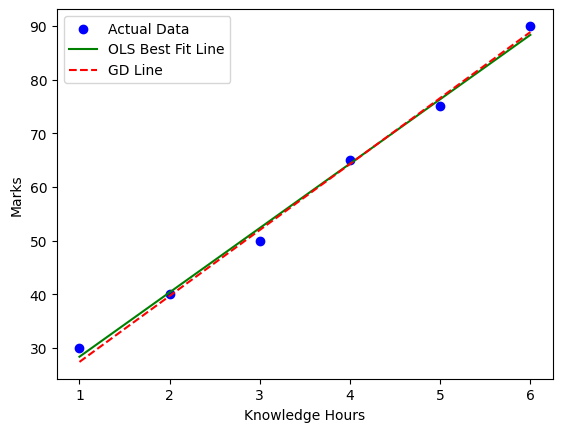

In [ ]:
# 📌 Step 6: Plot results
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred_ols, color="green", label="OLS Best Fit Line")
plt.plot(X, y_pred_gd, color="red", linestyle="--", label="GD Line")
plt.xlabel("Knowledge Hours")
plt.ylabel("Marks")
plt.legend()
plt.show()



---

📝 Practice Task: House Price Prediction (Simple Regression)

Dataset (tiny, you can write it directly in code)


---




| Size (sq ft) | Price (in 1000\$) |
| ------------ | ----------------- |
| 500          | 150               |
| 800          | 200               |
| 1000         | 250               |
| 1200         | 280               |
| 1500         | 350               |




---


1. Create arrays for X = size and y = price.

2. Split into training & testing (e.g., 80/20).

3. Train Linear Regression (OLS) model.

4. Train SGD Regressor (Gradient Descent) model.

5. Predict price for a new house of size 1000 sq ft.

6. Compare errors (MSE) of both models.

7. Plot actual data + both regression lines.







---

💡 Hints:

* Use train_test_split from sklearn.model_selection.

* Use LinearRegression and SGDRegressor.

* Plot scatter for actual data, green line for OLS, red dashed line for GD.


---



In [ ]:
# 📌 Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# 📌 Step 2: Dataset (House Size vs Price)
X = np.array([500, 800, 1000, 1200, 1500]).reshape(-1, 1)   # House size
y = np.array([150, 200, 250, 280, 350])                     # Price

In [ ]:
# 📌 Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 📌 Step 4: OLS Regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)     # 👉 fit OLS model on training data
y_pred_ols = ols_model.predict(X_test)     # 👉 predict on X_test

In [ ]:
# 📌 Step 5: Gradient Descent Regression
gd_model = SGDRegressor(max_iter=1000, learning_rate="constant", eta0=0.01)
gd_model.fit(X_train, y_train)     # 👉 fit GD model on training data
y_pred_gd = gd_model.predict(X_test)    # 👉 predict on X_test

In [ ]:
# 📌 Step 6: Compare errors
print("OLS MSE:", mean_squared_error(y_test, y_pred_ols))
print("GD MSE:", mean_squared_error(y_test, y_pred_gd))

OLS MSE: 67.36383054467805
GD MSE: 3.0663242901859215e+30


In [ ]:
# 📌 Step 7: Predict price for new house (1000 sq ft)
new_house = np.array([[1000]])
print("OLS Prediction:", ols_model.predict(new_house))
print("GD Prediction:", gd_model.predict(new_house))

OLS Prediction: [247.64150943]
GD Prediction: [2.18886786e+15]


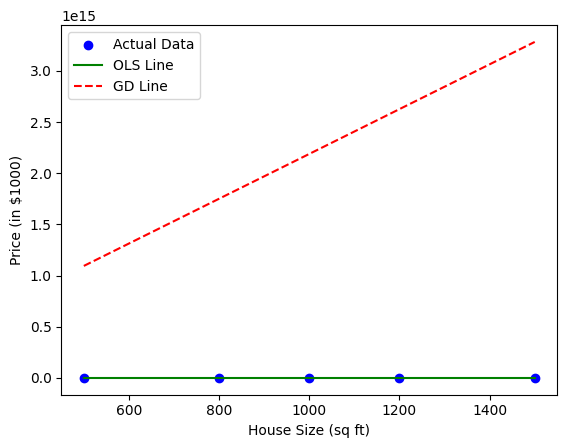

In [ ]:
# 📌 Step 8: Plot
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, ols_model.predict(X), color="green", label="OLS Line")
plt.plot(X, gd_model.predict(X), color="red", linestyle="--", label="GD Line")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price (in $1000)")
plt.legend()
plt.show()